In [155]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from time import sleep
from selenium.webdriver.common.action_chains import ActionChains
from collections import Counter
import re 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd  
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
import pandas as pd
from re import sub
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

## Data Scraping

In [ ]:
hrome_options = Options()
driver = webdriver.Chrome('C:\Program Files (x86)\chromedriver.exe')
driver.maximize_window()
Age=[]
Name=[]
Position=[]
Value=[]
Link=[]
Appearance=[]
Goal=[]
Assist=[]
Time=[]
Cap=[]
Trophy=[]
Int_goal=[]

for page in range(1,21): 
    url = 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=alle&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&page='+str(page)
    driver.get(url)

    for i in range(1,26):
        element=driver.find_element_by_xpath('//*[@id="yw1"]/table/tbody/tr['+str(i)+']')
        Age.append(int(element.find_element_by_xpath('td[3]').text))
        Name.append(element.find_element_by_xpath('td[2]/table/tbody/tr[1]/td[2]/a').text)
        Value.append(float(sub(r'[^\d.]', '', element.find_element_by_xpath('td[6]').text)))
        Position.append(element.find_element_by_xpath('td[2]/table/tbody/tr[2]/td').text)
        Link.append('https://www.transfermarkt.com/tom-davies/leistungsdatendetails/spieler/'+element.find_elements_by_xpath('td[2]/table/tbody/tr[1]/td[2]/a')[-1].get_attribute('id')+'/plus/0?saison=2020')

for link in Link:
    driver.get(link)
    
    
    try:
    
        Appearance.append(driver.find_element_by_xpath('//*[@id="yw1"]/table/tfoot/tr/td[4]').text)
        Goal.append(driver.find_element_by_xpath('//*[@id="yw1"]/table/tfoot/tr/td[5]').text)
        Assist.append(driver.find_element_by_xpath('//*[@id="yw1"]/table/tfoot/tr/td[6]').text)
        Time.append(driver.find_element_by_xpath('//*[@id="yw1"]/table/tfoot/tr/td[8]').text)
    except:
        Appearance.append('NA')
        Goal.append('NA')
        Assist.append('NA')
        Time.append('NA')
    
    try:                                                               
        Cap.append(driver.find_element_by_xpath('//*[@id="main"]/div[8]/div/div/div[3]/div/div[3]/p[2]/span[2]/a[1]').text)
        Int_goal.append(driver.find_element_by_xpath('//*[@id="main"]/div[8]/div/div/div[3]/div/div[3]/p[2]/span[2]/a[2]').text)
    except:
        
      
        try:    
            Cap.append(driver.find_element_by_xpath('//*[@id="main"]/div[8]/div/div/div[2]/div/div[3]/p[2]/span[2]/a[1]').text)
            Int_goal.append(driver.find_element_by_xpath('//*[@id="main"]/div[8]/div/div/div[2]/div/div[3]/p[2]/span[2]/a[2]').text)
        except:
            Cap.append(0)
            Int_goal.append(0)
            
    #Calculating sum of the achevment:       
    try:
        driver.find_element_by_xpath('//*[@id="achievements"]/a').click()
        
        s=0
        for ele in driver.find_elements_by_class_name('large-6')[1:]:
            x=ele.text[:2]
            if x[1].isdigit():
                s=s+int(x[:2])
            else:
                s=s+int(x[0])
    except:
        s=0

    Trophy.append(s)
                


In [ ]:
df=pd.DataFrame.from_dict({'Name': Name, 
'Age': Age,
'Appearance': Appearance,
'Goal': Goal,
'Assist':Assist,
'Time':Time,
'Position': Position,
'Value' : Value,
'Cap': Cap,
'Trophy': Trophy,                       
'Int_goal': Int_goal,  
'Link': Link
})

df.to_csv('Players_stats.csv')

In [26]:
#df=pd.read_csv('Players_stats.csv')

In [4]:
df.head(20)

,Unnamed: 0,Name,Age,Appearance,Goal,Assist,Time,Position,Value,Cap,Trophy,Int_goal,Link
0,0,Kylian Mbappé,22,47.0,42,11,3.720',Centre-Forward,160.0,49,23,17,https://www.transfermarkt.com/tom-davies/leist...
1,1,Erling Haaland,21,41.0,41,12,3.540',Centre-Forward,130.0,15,8,12,https://www.transfermarkt.com/tom-davies/leist...
2,2,Harry Kane,28,49.0,33,17,3.982',Centre-Forward,120.0,64,7,41,https://www.transfermarkt.com/tom-davies/leist...
3,3,Jadon Sancho,21,38.0,16,20,2.974',Left Winger,100.0,22,4,3,https://www.transfermarkt.com/tom-davies/leist...
4,4,Mohamed Salah,29,51.0,31,6,4.178',Right Winger,100.0,69,17,43,https://www.transfermarkt.com/tom-davies/leist...
5,5,Romelu Lukaku,28,44.0,30,10,3.565',Centre-Forward,100.0,100,7,67,https://www.transfermarkt.com/tom-davies/leist...
6,6,Kevin De Bruyne,30,40.0,10,18,3.013',Attacking Midfield,100.0,84,17,22,https://www.transfermarkt.com/tom-davies/leist...
7,7,Neymar,29,31.0,17,11,2.323',Left Winger,100.0,113,31,69,https://www.transfermarkt.com/tom-davies/leist...
8,8,Frenkie de Jong,24,51.0,7,9,4.492',Central Midfield,90.0,33,3,1,https://www.transfermarkt.com/tom-davies/leist...
9,9,Bruno Fernandes,27,58.0,28,17,4.584',Attacking Midfield,90.0,36,9,5,https://www.transfermarkt.com/tom-davies/leist...


## Data Cleaning & Preparation

In [27]:
#Turning time data into numbers:
df.Time=df.Time.str.replace("'", '')
df.Time=df.Time.str.replace(".", '')

#Replacing incomplete values with 0:
df=df.fillna(0)
df[['Goal','Assist']]=df[['Goal','Assist']].replace('-', 0)

#Removing Goalkeepers because they have a different role as the rest of the players:
df=df.drop(df[df.Position=='Goalkeeper'].index)

#Selecting only the related columns:
df=df[['Age','Position','Appearance','Goal','Assist','Time','Cap','Trophy','Int_goal','Value']]

# Assigning numerical values to each player's position:
LE = df['Position'].astype('category')
df.Position=LE.cat.codes

#Turning data into numbers:
df=df.astype(int)

## Exploratory data analysis 

In [29]:
df.describe()

,Age,Position,Appearance,Goal,Assist,Time,Cap,Trophy,Int_goal,Value
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,24.962500,4.089583,37.081250,6.743750,4.877083,2699.770833,24.837500,5.510417,4.745833,35.239583
std,3.189664,3.197451,9.141412,7.646343,4.252409,858.194613,25.572417,8.148920,10.382154,19.160864
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,23.000000,2.000000,33.000000,2.000000,1.000000,2173.750000,6.000000,1.000000,0.000000,22.000000
50%,25.000000,3.000000,38.000000,4.000000,4.000000,2813.500000,17.000000,3.000000,1.000000,29.000000
75%,27.000000,6.000000,43.000000,9.000000,7.000000,3312.250000,36.000000,7.000000,5.000000,40.000000
max,36.000000,11.000000,58.000000,48.000000,24.000000,4709.000000,180.000000,84.000000,111.000000,160.000000


<AxesSubplot:>

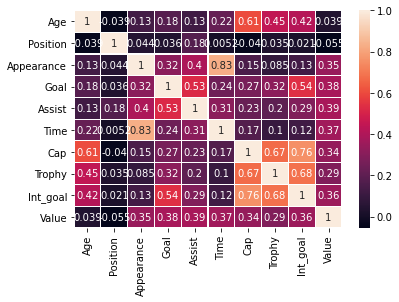

In [40]:
sns.heatmap(df.corr(), annot=True, linewidths=.1)

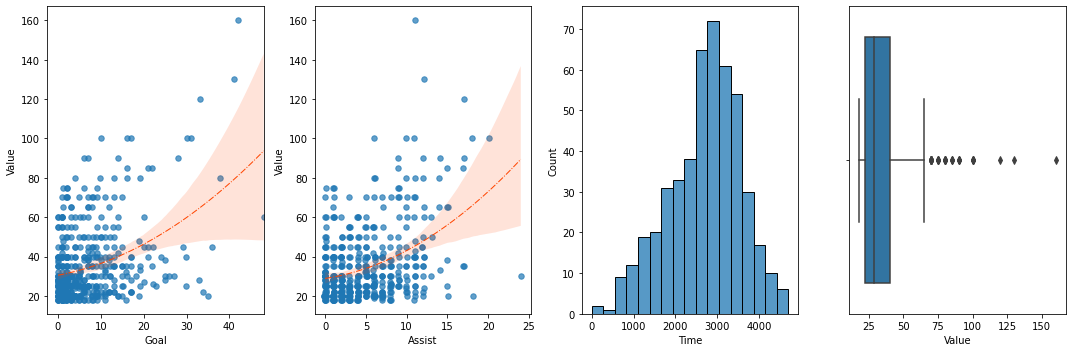

In [111]:
#We see that players' Value has the highest correclation with Goals, assists and Time a certain players has on the pitch.
fig, ax =plt.subplots(1,4, figsize=(15,5))
sns.regplot(x='Goal', y='Value',data=df, x_jitter=0.1, order=2, line_kws={'lw':1,'color': '#FF4500' ,'linestyle':'-.'}, scatter_kws={'s':30, 'alpha':0.7},ax=ax[0])
sns.regplot(x='Assist', y='Value',data=df, x_jitter=0.1, order=2, line_kws={'lw':1,'color': '#FF4500' ,'linestyle':'-.'}, scatter_kws={'s':30, 'alpha':0.7},ax=ax[1])
sns.boxplot(x='Value',data=df,ax= ax[3])
sns.histplot(x='Time',data=df,ax= ax[2])
plt.tight_layout()
plt.show()

## Linear Regression Model

In [113]:
X=df[['Age','Position','Appearance','Goal','Assist','Time','Cap','Trophy','Int_goal']]
y=df.Value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, y_train)
#Printing the results of regression:
y_pred=reg.predict(X_test)
print('Coefficients: \n', reg.coef_)
print('Intercept:%.3f'% reg.intercept_)
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.3f' %r2_score(y_test, y_pred))

Coefficients: 
 [-1.68587652 -0.6115876  -0.07101107  0.51164882  0.79478455  0.0061313
  0.21262699  0.34521799 -0.22783561]
Intercept:52.021
Mean squared error (MSE): 285.529
Coefficient of determination (R^2): 0.416


<AxesSubplot:xlabel='Value'>

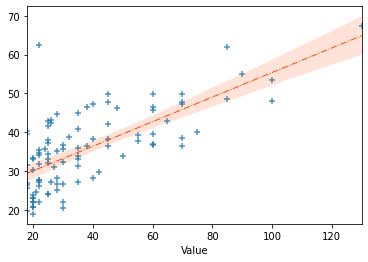

In [127]:
#Plotting predicted values with respect to real values:
sns.regplot(x=y_test, y=y_pred,line_kws={'lw':1,'color': '#FF4500' ,'linestyle':'-.'}, marker="+")